In [416]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn import preprocessing

# **Dataset Import**

In [417]:
train_dataset = "../Train/Final_Train.csv"
dataset = pd.read_csv(train_dataset) 
dataset

,Unnamed: 0,MOFnumber,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,...,metal_type,number_of_metal_atom,total_degree_of_unsaturation,degree_of_unsaturation_per_carbon,metallic_percentage,oxygen_to_metal_ratio,electronegative_atoms_to_total_atoms_ratio,weighted_electronegativity_per_atom,nitrogen_to_oxygen_ratio,CO2_working_capacity [mL/g]
0,0,1,mof_unit_1,1116.667429,875.240600,0.00,0.07899,0.0607,COOH-OEt,3,...,Zn,2,54.0,1.800000,6.666667,21.000000,0.306667,1.044267,0.095238,105.284502
1,1,2,mof_unit_2,2769.503842,2211.697211,603.61,0.13794,0.1040,F-OMe,10,...,Ba,2,105.0,1.478873,2.816901,35.000000,0.237113,0.846289,0.000000,101.224774
2,2,3,mof_unit_3,1089.818728,773.687960,788.50,0.14874,0.1262,OMe-COOH,2,...,Cu,2,47.0,1.566667,6.666667,14.000000,0.195122,0.661463,0.142857,118.987011
3,3,4,mof_unit_4,2205.198301,1304.638720,1441.53,0.21814,0.2220,H-SO3H,9,...,V,4,100.0,1.785714,7.142857,11.500000,0.205357,0.706429,0.000000,187.626004
4,4,5,mof_unit_5,1137.800963,901.736120,0.00,0.07778,0.0591,NHMe-OH,2,...,Cu,2,47.0,1.678571,7.142857,18.000000,0.276596,0.917447,0.444444,79.210001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68608,68608,68609,mof_unit_68609,1188.302573,1001.700216,0.00,0.00000,0.0000,Pr-F,3,...,Zn,2,68.0,1.446809,4.255319,8.000000,0.126050,0.449580,0.250000,-12.943652
68609,68609,68610,mof_unit_68610,1506.660363,1493.296496,0.00,0.01108,0.0000,SO3H,10,...,Ba,2,53.0,1.394737,5.263158,27.000000,0.214286,0.737143,0.000000,-12.985582
68610,68610,68611,mof_unit_68611,2035.532738,1959.518320,0.00,0.00000,0.0000,OPr,4,...,Cr,6,139.0,1.579545,6.818182,10.666667,0.156863,0.539608,0.000000,-13.187635
68611,68611,68612,mof_unit_68612,3985.426053,3638.677280,0.00,0.00000,0.0000,OPr-Me,4,...,Cr,12,256.0,1.600000,7.500000,10.000000,0.164835,0.567033,0.000000,15.672698


# **Surface Area Organizer**

In [418]:
# Surface_Test = "../Train/Surface_ALL.csv"
# Surface = pd.read_csv(Surface_Test) 
# for x in range(0,Surface.shape[0]) :
#     if(Surface.iloc[x][4]>0 and Surface.iloc[x][3] <=0):
#       # i+=1;
#       dataset['surface_area [m^2/g]'][x] = Surface.iloc[x][8]

# **Cleansing Dataset**

In [419]:
# drop_A=dataset.index[dataset["surface_area [m^2/g]"] <= 0].tolist()
# drop_B=dataset.index[dataset["void_fraction"] == 0].tolist()
# drop_C=dataset.index[dataset["void_volume [cm^3/g]"] == 0].tolist()
# drop_D=dataset.index[dataset["CO2/N2_selectivity"] == 0].tolist()
# drop_E=dataset.index[dataset["heat_adsorption_CO2_P0.15bar_T298K [kcal/mol]"] == 0].tolist()
# drop_F=dataset.index[dataset["CO2_working_capacity [mL/g]"] == 0].tolist()
# cleaned_value=drop_A+drop_B+drop_C+drop_D+drop_E

dataset = dataset.drop(68611)
dataset = dataset.drop(68612)

# dataset = dataset.drop(dataset.index[cleaned_value])

dataset = dataset.dropna(axis='rows')
dataset.shape

(66203, 44)

Drop Feature

In [420]:
trainset = dataset
trainset = trainset.drop('MOFname',axis=1)
trainset = trainset.drop('MOFnumber',axis=1)
trainset = trainset.drop('Unnamed: 0',axis=1)
trainset = trainset.drop('functional_groups',axis=1)
trainset = trainset.drop('topology',axis=1)
trainset = trainset.drop('metal_type',axis=1)
trainset = trainset.drop('number_of_metal_atom',axis=1)
# trainset = trainset.drop('O',axis=1)
# trainset = trainset.drop('C',axis=1)
# trainset = trainset.drop('N',axis=1)
# trainset = trainset.drop('H',axis=1)
# trainset = trainset.drop('P',axis=1)
# trainset = trainset.drop('F',axis=1)
# trainset = trainset.drop('S',axis=1)
# trainset = trainset.drop('Br',axis=1)
# trainset = trainset.drop('Cl',axis=1)
# trainset = trainset.drop('I',axis=1)
# trainset = trainset.drop('Cu',axis=1)
# trainset = trainset.drop('V',axis=1)
# trainset = trainset.drop('Zn',axis=1)
# trainset = trainset.drop('Ba',axis=1)
# trainset = trainset.drop('Cr',axis=1)
# trainset = trainset.drop('Ni',axis=1)

trainset

,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],metal_linker,organic_linker1,organic_linker2,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],...,Cr,Ni,total_degree_of_unsaturation,degree_of_unsaturation_per_carbon,metallic_percentage,oxygen_to_metal_ratio,electronegative_atoms_to_total_atoms_ratio,weighted_electronegativity_per_atom,nitrogen_to_oxygen_ratio,CO2_working_capacity [mL/g]
0,1116.667429,875.240600,0.00,0.07899,0.0607,3,4,11,22.864166,6.786041,...,0,0,54.0,1.800000,6.666667,21.0,0.306667,1.044267,0.095238,105.284502
1,2769.503842,2211.697211,603.61,0.13794,0.1040,10,44,57,33.616780,7.147286,...,0,0,105.0,1.478873,2.816901,35.0,0.237113,0.846289,0.000000,101.224774
2,1089.818728,773.687960,788.50,0.14874,0.1262,2,22,24,19.263726,6.347967,...,0,0,47.0,1.566667,6.666667,14.0,0.195122,0.661463,0.142857,118.987011
3,2205.198301,1304.638720,1441.53,0.21814,0.2220,9,17,24,25.701377,6.190085,...,0,0,100.0,1.785714,7.142857,11.5,0.205357,0.706429,0.000000,187.626004
4,1137.800963,901.736120,0.00,0.07778,0.0591,2,1,22,30.001838,6.478063,...,0,0,47.0,1.678571,7.142857,18.0,0.276596,0.917447,0.444444,79.210001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66519,1426.479810,1272.451540,1343.62,0.30190,0.2038,3,12,21,5.867674,4.485481,...,0,0,33.0,1.833333,11.111111,8.0,0.227273,0.763636,0.250000,7.602105
66520,23943.701370,5497.752320,4182.24,0.66340,1.7399,1,9,27,4.060772,3.605688,...,0,0,434.0,1.870690,6.896552,8.5,0.210084,0.695798,0.470588,2.675231
66521,14389.971560,4396.164320,4149.64,0.57051,1.1246,1,9,20,4.313411,3.361233,...,0,0,290.0,1.726190,9.523810,7.5,0.200000,0.681412,0.000000,-1.686092
66522,16997.806650,3932.703680,4326.62,0.66963,1.7430,2,2,5,3.447440,2.781566,...,0,0,338.0,2.112500,7.500000,8.0,0.281690,0.923944,0.666667,-7.546805


Dummy

In [421]:
# topology = trainset["topology"].values
# trainset["topology"] = topology
# trainset = pd.get_dummies(trainset)
# trainset

# **Nomalizing Dataset**

In [422]:
def normalize(df):
    result = df.copy()
    for feature in df.columns:
        maxvalue = df[feature].max()
        minvalue = df[feature].min()
        cap = maxvalue - minvalue
        max = maxvalue + (0.1*cap)
        min = minvalue - (0.1*cap)
        result[feature] = (df[feature] - min) / (max - min)
        MaxMin[feature] = [max,min]
    return result

In [423]:
MaxMin = {}
X_normalize = normalize(trainset)
X_normalize

Y = X_normalize["CO2_working_capacity [mL/g]"].values
X_normalize = X_normalize.drop('CO2_working_capacity [mL/g]',axis=1)

In [424]:
MaxMinData = pd.DataFrame(data=MaxMin)
MaxMinData.to_csv("MaxMinData", index=False)

In [425]:
X_normalize

,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],metal_linker,organic_linker1,organic_linker2,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],...,Ba,Cr,Ni,total_degree_of_unsaturation,degree_of_unsaturation_per_carbon,metallic_percentage,oxygen_to_metal_ratio,electronegative_atoms_to_total_atoms_ratio,weighted_electronegativity_per_atom,nitrogen_to_oxygen_ratio
0,0.085236,0.099730,0.083451,0.563638,0.090986,0.234848,0.126437,0.227011,0.102983,0.360721,...,0.083333,0.083333,0.083333,0.099057,0.321102,0.235882,0.282197,0.402938,0.411481,0.086941
1,0.091403,0.149996,0.154452,0.589879,0.096445,0.765152,0.701149,0.887931,0.112799,0.380089,...,0.500000,0.083333,0.083333,0.121968,0.178680,0.127144,0.414773,0.320847,0.340932,0.083333
2,0.085136,0.095911,0.176200,0.594686,0.099243,0.159091,0.385057,0.413793,0.099697,0.337234,...,0.083333,0.083333,0.083333,0.095912,0.217617,0.235882,0.215909,0.271286,0.275069,0.088745
3,0.089298,0.115880,0.253014,0.625579,0.111321,0.689394,0.313218,0.413793,0.105573,0.328769,...,0.083333,0.083333,0.083333,0.119721,0.314766,0.249332,0.192235,0.283366,0.291092,0.083333
4,0.085315,0.100727,0.083451,0.563099,0.090784,0.159091,0.083333,0.385057,0.109499,0.344209,...,0.083333,0.083333,0.083333,0.095912,0.267247,0.249332,0.253788,0.367446,0.366289,0.100168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66519,0.086392,0.114670,0.241497,0.662864,0.109026,0.234848,0.241379,0.370690,0.087468,0.237377,...,0.083333,0.083333,0.083333,0.089623,0.335885,0.361417,0.159091,0.309232,0.311478,0.092803
66520,0.170402,0.273587,0.575396,0.823783,0.302682,0.083333,0.198276,0.456897,0.085819,0.190208,...,0.083333,0.083333,0.083333,0.269766,0.352453,0.242375,0.163826,0.288945,0.287304,0.101159
66521,0.134758,0.232156,0.571561,0.782434,0.225111,0.083333,0.198276,0.356322,0.086050,0.177101,...,0.083333,0.083333,0.083333,0.205076,0.288367,0.316583,0.154356,0.277044,0.282178,0.083333
66522,0.144488,0.214724,0.592379,0.826556,0.303073,0.159091,0.097701,0.140805,0.085259,0.146023,...,0.083333,0.083333,0.083333,0.226640,0.459697,0.259420,0.159091,0.373459,0.368604,0.108586


# **Modeling**

In [426]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [427]:
X = X_normalize
X, Y = X.astype('float'), Y.astype('float')


In [428]:
n_features = X.shape[1]

In [429]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.00001)
print(X_train.shape)
print(X_test.shape)

(66202, 36)
(1, 36)


In [430]:
model = Sequential()
model.add(Dense(64, input_dim=n_features, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 64)                2368      
_________________________________________________________________
dense_121 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_122 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_123 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_124 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_125 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_126 (Dense)            (None, 8)               

In [431]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=opt, metrics=['mse'])
history = model.fit(X_train, Y_train, epochs=2000, batch_size=128, verbose=1) 

Epoch 1/1700
518/518 [==============================] - 1s 678us/step - loss: 0.0040 - mse: 0.0040
Epoch 2/1700
518/518 [==============================] - 0s 651us/step - loss: 0.0022 - mse: 0.0022
Epoch 3/1700
518/518 [==============================] - 0s 651us/step - loss: 0.0022 - mse: 0.0022
Epoch 4/1700
518/518 [==============================] - 0s 779us/step - loss: 0.0019 - mse: 0.0019
Epoch 5/1700
518/518 [==============================] - 0s 703us/step - loss: 0.0018 - mse: 0.0018
Epoch 6/1700
518/518 [==============================] - 0s 641us/step - loss: 0.0017 - mse: 0.0017
Epoch 7/1700
518/518 [==============================] - 0s 620us/step - loss: 0.0017 - mse: 0.0017
Epoch 8/1700
518/518 [==============================] - 0s 625us/step - loss: 0.0016 - mse: 0.0016
Epoch 9/1700
518/518 [==============================] - 0s 636us/step - loss: 0.0015 - mse: 0.0015
Epoch 10/1700
518/518 [==============================] - 0s 614us/step - loss: 0.0016 - mse: 0.0016
Epoch 11/

In [432]:
# opt = tf.keras.optimizers.SGD(
#     learning_rate=0.01, momentum=0.80, nesterov=False, name="SGD"
# )
# model.compile(loss='mse', optimizer=opt, metrics=['mse'])
# history = model.fit(X_train, Y_train, epochs=2000, batch_size=128, verbose=1) 

# # learning_rate=0.01, momentum=0.80, nesterov=False, name="SGD" E2000 B512 6.6328e-04 
# #   MAE: 0.040
# #   MAE_train: 0.018

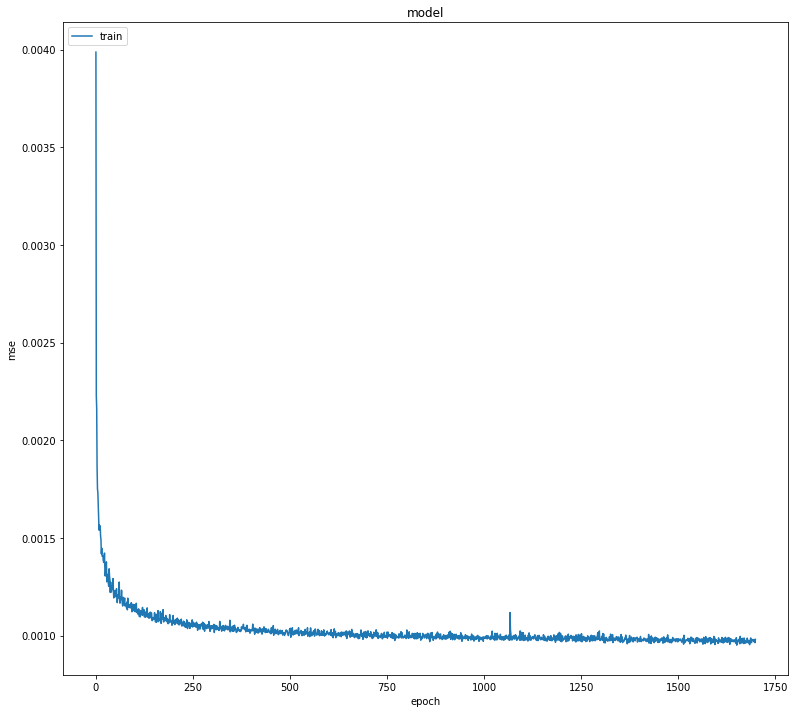

In [433]:
plt.plot(history.history['mse'])
plt.title('model')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.rcParams['figure.figsize'] = [13, 12]

plt.show()

In [434]:
Y_pred_test = model.predict(X_test)
Y_pred_train = model.predict(X_train)
error = mean_absolute_error(Y_test, Y_pred_test)
error_train = mean_absolute_error(Y_train, Y_pred_train)
print('MAE: %.3f' % error)
print('MAE_train: %.3f' % error_train)


MAE: 0.046
MAE_train: 0.022


In [435]:
model.save("model.h5")

# **Prediction**

---

**Preprocessing Test set**

In [436]:
def normalize_pred(df):
  result = df.copy()
  for feature in df.columns:
    max = MaxMinData[feature][0]
    min = MaxMinData[feature][1]
    result[feature] = (df[feature] - min) / (max - min)
  return result

In [437]:
dataset_test_path = '../Test/Final_Test.csv'
MaxMinData = pd.read_csv("MaxMinData")

dataset_test = pd.read_csv(dataset_test_path)
# subdata = subdata.drop('MOFname',axis=1)
# subdata["topology_code"] = pd.factorize(subdata.topology)[0]
# subdata["topology_code"] = subdata["topology_code"] + 1
# subdata = subdata.drop('topology',axis=1)
# subdata = normalize(subdata)

# subdata = subdata.drop('topology_code',axis=1)
# subdata = subdata.drop('functional_groups',axis=1)

# title = list(subdata.columns)
# title[10], title[12] = title[12], title[11]
# subdata = subdata[title]

dataset_test

,Unnamed: 0,MOFnumber,MOFname,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],functional_groups,metal_linker,...,Ni,metal_type,number_of_metal_atom,total_degree_of_unsaturation,degree_of_unsaturation_per_carbon,metallic_percentage,oxygen_to_metal_ratio,electronegative_atoms_to_total_atoms_ratio,weighted_electronegativity_per_atom,nitrogen_to_oxygen_ratio
0,0,1,mof_unit_68614,1208.301332,797.70936,586.54,0.11392,0.1039,OEt,2,...,0,Cu,2,51.0,1.593750,6.250000,14.000000,0.190476,0.645714,0.142857
1,1,2,mof_unit_68615,4126.414623,3733.65779,852.49,0.21367,0.1422,H-I,4,...,0,Cr,6,164.0,1.822222,6.666667,8.666667,0.164557,0.566076,0.000000
2,2,3,mof_unit_68616,1602.148373,747.21048,3155.73,0.33883,0.4375,CN-OH,3,...,0,Zn,2,62.0,2.066667,6.666667,10.000000,0.266667,0.877333,0.600000
3,3,4,mof_unit_68617,2436.629312,995.80232,3521.09,0.40464,0.5963,OMe,2,...,0,Cu,2,80.0,1.818182,4.545455,16.000000,0.212766,0.714894,0.250000
4,4,5,mof_unit_68618,3123.418006,1337.53800,2678.46,0.38959,0.5479,NO2-Pr,3,...,0,Zn,2,87.0,2.071429,4.761905,28.000000,0.372881,1.228475,0.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,16995,16996,mof_unit_85609,32660.944610,4723.68288,5720.14,0.77614,3.2318,OH-NO2,3,...,0,Zn,12,370.0,1.778846,5.769231,12.666667,0.201923,0.686923,0.105263
16996,16996,16997,mof_unit_85610,5070.998617,1499.13262,4017.28,0.59192,1.2058,Me-OMe,3,...,0,Zn,6,89.0,1.679245,11.320755,9.000000,0.217742,0.749032,0.000000
16997,16997,16998,mof_unit_85611,4669.804446,1322.04892,4288.76,0.54950,1.1689,Me-CN,2,...,0,Cu,2,141.0,2.203125,3.125000,8.000000,0.250000,0.788571,2.500000
16998,16998,16999,mof_unit_85612,4682.120862,1213.51148,4331.86,0.60643,1.4091,OH-HCO,3,...,0,Zn,2,101.0,1.870370,3.703704,24.000000,0.250000,0.852308,0.083333


In [438]:
dataset_test = pd.read_csv(dataset_test_path)
dataset_test = dataset_test.drop('MOFname',axis=1)
dataset_test = dataset_test.drop('MOFnumber',axis=1)
dataset_test = dataset_test.drop('Unnamed: 0',axis=1)
dataset_test = dataset_test.drop('functional_groups',axis=1)
dataset_test = dataset_test.drop('topology',axis=1)
dataset_test = dataset_test.drop('metal_type',axis=1)
dataset_test = dataset_test.drop('number_of_metal_atom',axis=1)
# dataset_test = dataset_test.drop('O',axis=1)
# dataset_test = dataset_test.drop('C',axis=1)
# dataset_test = dataset_test.drop('N',axis=1)
# dataset_test = dataset_test.drop('H',axis=1)
# dataset_test = dataset_test.drop('P',axis=1)
# dataset_test = dataset_test.drop('F',axis=1)
# dataset_test = dataset_test.drop('S',axis=1)
# dataset_test = dataset_test.drop('Br',axis=1)
# dataset_test = dataset_test.drop('Cl',axis=1)
# dataset_test = dataset_test.drop('I',axis=1)

# dataset_test = dataset_test.drop('metal_type',axis=1)

In [439]:
# topology = dataset_test["topology"].values
# dataset_test["topology"] = topology
# dataset_test = pd.get_dummies(dataset_test)
# dataset_test

In [440]:
dataset_test = normalize_pred(dataset_test)
dataset_test = dataset_test.astype('float')

In [441]:
dataset_test

,volume [A^3],weight [u],surface_area [m^2/g],void_fraction,void_volume [cm^3/g],metal_linker,organic_linker1,organic_linker2,CO2/N2_selectivity,heat_adsorption_CO2_P0.15bar_T298K [kcal/mol],...,Ba,Cr,Ni,total_degree_of_unsaturation,degree_of_unsaturation_per_carbon,metallic_percentage,oxygen_to_metal_ratio,electronegative_atoms_to_total_atoms_ratio,weighted_electronegativity_per_atom,nitrogen_to_oxygen_ratio
0,0.085578,0.096814,0.152444,0.579186,0.096432,0.159091,0.140805,0.442529,0.115558,0.372494,...,0.083333,0.083333,0.083333,0.097709,0.229629,0.224113,0.215909,0.265803,0.269457,0.088745
1,0.096466,0.207238,0.183727,0.623589,0.101260,0.310606,0.155172,0.313218,0.098900,0.271365,...,0.083333,0.500000,0.083333,0.148473,0.330957,0.235882,0.165404,0.235212,0.241078,0.083333
2,0.087048,0.094915,0.454651,0.679303,0.138489,0.234848,0.227011,0.313218,0.094036,0.267397,...,0.083333,0.083333,0.083333,0.102650,0.439370,0.235882,0.178030,0.355727,0.351994,0.106061
3,0.090161,0.104265,0.497627,0.708598,0.158509,0.159091,0.083333,0.471264,0.090876,0.270659,...,0.083333,0.083333,0.083333,0.110737,0.329165,0.175968,0.234848,0.292111,0.294109,0.092803
4,0.092723,0.117118,0.398511,0.701899,0.152407,0.234848,0.183908,0.341954,0.093956,0.280385,...,0.083333,0.083333,0.083333,0.113881,0.441482,0.182081,0.348485,0.481088,0.477123,0.104978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,0.202926,0.244474,0.756295,0.873969,0.490765,0.234848,0.112069,0.270115,0.086253,0.165599,...,0.083333,0.083333,0.083333,0.241015,0.311720,0.210534,0.203283,0.279313,0.284142,0.087321
16996,0.099990,0.123195,0.555992,0.791964,0.235348,0.234848,0.083333,0.227011,0.088270,0.193059,...,0.083333,0.083333,0.083333,0.114780,0.267546,0.367338,0.168561,0.297984,0.306274,0.083333
16997,0.098493,0.116535,0.587926,0.773082,0.230696,0.159091,0.169540,0.399425,0.086372,0.189530,...,0.083333,0.083333,0.083333,0.138140,0.499890,0.135846,0.159091,0.336056,0.320364,0.178030
16998,0.098539,0.112453,0.592995,0.798423,0.260978,0.234848,0.169540,0.428161,0.086515,0.182102,...,0.083333,0.083333,0.083333,0.120171,0.352311,0.152192,0.310606,0.336056,0.343076,0.086490


Predicting

In [442]:
from keras.models import load_model
import numpy as np

In [443]:
# model = load_model('/content/drive/MyDrive/Colab Notebooks/TMLCC/CleanOutput_1/modelv1.h5')

In [444]:
result = model.predict(dataset_test)
result
with np.printoptions(threshold=np.inf):
    print(result)

[[0.3444075 ]
 [0.19949514]
 [0.21836096]
 [0.20465092]
 [0.20241198]
 [0.21161124]
 [0.28259563]
 [0.365431  ]
 [0.21716258]
 [0.32606313]
 [0.19541052]
 [0.21327165]
 [0.449918  ]
 [0.36636695]
 [0.25615734]
 [0.30162483]
 [0.19539155]
 [0.19775777]
 [0.26244622]
 [0.20485792]
 [0.3602039 ]
 [0.25655514]
 [0.23117319]
 [0.23594412]
 [0.41878107]
 [0.29404855]
 [0.26057625]
 [0.37641427]
 [0.21111949]
 [0.21461776]
 [0.26735184]
 [0.2521911 ]
 [0.4607444 ]
 [0.23055242]
 [0.30324423]
 [0.21298638]
 [0.4173394 ]
 [0.21403995]
 [0.22313985]
 [0.32150844]
 [0.23262472]
 [0.23831639]
 [0.22888786]
 [0.36610103]
 [0.20977673]
 [0.27110875]
 [0.4041231 ]
 [0.30862957]
 [0.2104406 ]
 [0.22101164]
 [0.21866995]
 [0.24728496]
 [0.33290756]
 [0.22571337]
 [0.4632594 ]
 [0.25173092]
 [0.44006467]
 [0.24920651]
 [0.20947799]
 [0.30395198]
 [0.21444482]
 [0.21100485]
 [0.31578356]
 [0.27694803]
 [0.33596864]
 [0.231841  ]
 [0.22511548]
 [0.26559392]
 [0.2461228 ]
 [0.22718233]
 [0.22929431]
 [0.25

Denormalization

In [445]:
def denormalization(input):
    result = []
    cap = MaxMinData['CO2_working_capacity [mL/g]'][0] - MaxMinData['CO2_working_capacity [mL/g]'][1]
    for i in range(len(input)):
        result.append(((input[i][0]*cap) + MaxMinData['CO2_working_capacity [mL/g]'][1]))
    return result

In [446]:
result = denormalization(result)
result

[200.188503941571,
 64.49012512526257,
 82.15640052270514,
 69.31809086888985,
 67.22150580107974,
 75.83584950658117,
 142.30683210923002,
 219.8752748886459,
 81.03421617814347,
 183.01052427108863,
 60.66522100169966,
 77.39068222829685,
 298.99031770763463,
 220.75170669439456,
 117.54956618407921,
 160.12609585754387,
 60.64745794344908,
 62.863221550550705,
 123.43858511893295,
 69.51192169540879,
 214.98051279007325,
 117.92207412049486,
 94.153985885354,
 98.62156945660315,
 269.8331715565857,
 153.03153318300758,
 121.68750758084967,
 230.16018329161335,
 75.37536350082554,
 78.65120354025531,
 128.03228221765153,
 113.83551024177514,
 309.1283494796944,
 93.57268875757684,
 161.64252800085768,
 77.12355262330955,
 268.48317912954263,
 78.11013492538969,
 86.63143536897847,
 178.74543677315626,
 95.51322961453378,
 100.8429982653149,
 92.0139629539665,
 220.5026889901215,
 74.11798177104019,
 131.55031660276478,
 256.1071973696912,
 166.68545047060434,
 74.73964694871437,
 84.

In [447]:
formatter = {"CO2_working_capacity [mL/g]":[],"id":[]}
for i in range(68614,85614):
    formatter['CO2_working_capacity [mL/g]'].append(result[i-68614])
    formatter['id'].append(str(i))

In [448]:
df_submission = pd.DataFrame(data=formatter)
id = df_submission['id'].values
output = df_submission['CO2_working_capacity [mL/g]'].values
submission = pd.DataFrame({"id": id,"CO2_working_capacity [mL/g]": output})

In [449]:
submission

,id,CO2_working_capacity [mL/g]
0,68614,200.188504
1,68615,64.490125
2,68616,82.156401
3,68617,69.318091
4,68618,67.221506
...,...,...
16995,85609,0.840943
16996,85610,0.840943
16997,85611,0.840943
16998,85612,0.840943


In [450]:
submission.to_csv("submission.csv", index=False)